In [361]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score
import pandas as pd
import sqlite3
from pathlib import Path


In [362]:
dbPath = Path("../../data/data.sqlite")
if not dbPath.exists():
    # Avoid creating an empty database
    raise Exception("Database file does not exist")
con = sqlite3.connect(dbPath)

In [363]:
customerTypeMap = ["Student", "Teenager", "Adult", "Senior"]
customerLocationMap = ["Munich District One","Munich District Three","Munich District Two","Munich District Four","Munich District Five"]
distributionChannelMap =  ["Feedera SE", "Deliver Now Holding", "Deliveruu Inc.", "Orderly SE", "BestOrder Inc.", "TownExpress Inc.", "Heropizza Lmtd."]
weekdayMap = ["Sunday", "Tuesday", "Friday", "Saturday", "Wednesday", "Monday", "Thursday"]
costfactorMap = ["","Chef 2","Chef 1","Ingredients","Delivery Scooters","Phone Bill","Delivery Guy 2","Distribution channel fees","Waiter","Delivery Guy 1"]
sizeMap = ["Medium", "Small", "Large"]
typeMap = ["Funghi", "Salami", "Calzone", "Speciale", "Magherita", "Paprika", "Veggie"]

In [364]:
df = pd.read_sql("SELECT * FROM Pizza_Case WHERE Variant != 5", con)
# df.drop(["_CASE_KEY"], axis=1, inplace=True)
df.drop("Customer_ID", axis=1, inplace=True)

# df["CustomerType"] = df["CustomerType"].map(customerTypeMap.index)
# df["CustomerLocation"] = df["CustomerLocation"].map(customerLocationMap.index)
# df["DistributionChannel"] = df["DistributionChannel"].map(distributionChannelMap.index)
# df["Weekday"] = df["Weekday"].map(weekdayMap.index)
# df["CostFactor"] = df["CostFactor"].map(costfactorMap.index)
# df["PizzaSize"] = df["PizzaSize"].map(sizeMap.index)
# df["PizzaType"] = df["PizzaType"].map(typeMap.index)

df = pd.get_dummies(df, columns=["CustomerType", "CustomerLocation", "DistributionChannel", "Weekday", "CostFactor", "PizzaSize", "PizzaType"])
df = pd.get_dummies(df, columns=["Variant"])

df["Profit"] = df["Revenue"] - df["Costs"]
df["IsOrderProfitable"] = df["Profit"] > 0

df

,_CASE_KEY,Revenue,Costs,CustomerSatisfaction,Daytime,CustomerType_Adult,CustomerType_Senior,CustomerType_Student,CustomerType_Teenager,CustomerLocation_Munich District Five,...,Variant_1,Variant_2,Variant_3,Variant_4,Variant_6,Variant_7,Variant_8,Variant_9,Profit,IsOrderProfitable
0,895,17,13,3,14,False,False,True,False,False,...,True,False,False,False,False,False,False,False,4,True
1,426,19,10,3,13,False,False,True,False,False,...,True,False,False,False,False,False,False,False,9,True
2,690,9,16,0,12,False,False,False,True,False,...,True,False,False,False,False,False,False,False,-7,False
3,185,36,56,1,18,True,False,False,False,False,...,True,False,False,False,False,False,False,False,-20,False
4,1721,5,35,5,14,False,False,True,False,False,...,True,False,False,False,False,False,False,False,-30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1958,11,2,5,18,False,False,True,False,True,...,False,False,False,False,False,False,False,True,9,True
1822,792,54,23,3,11,False,False,True,False,False,...,False,False,False,False,False,False,False,True,31,True
1823,1500,29,2,4,18,False,False,False,True,False,...,False,False,False,False,False,False,False,True,27,True
1824,605,12,12,3,21,False,False,True,False,False,...,False,False,False,False,False,False,False,True,0,False


In [365]:
# Extract the features and target variable
# X = df.drop(['CustomerSatisfaction'], axis=1)
# y = df['CustomerSatisfaction']

def algo(df, column: str):
    df = df.copy()
    X = df.drop([column], axis=1)
    y = df[column]


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training data
    clf = RandomForestClassifier(random_state=42) # Going with RandomForest because it is 0.3324 accurate (DecisionTree is 0.24)
    clf.fit(X_train, y_train)

    # Evaluate the performance of the classifier on the testing data
    score = clf.score(X_test, y_test)
    print('Accuracy:', score)
    # recall

    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred, average='macro')
    print('Recall:', recall)

    # precision
    precision = precision_score(y_test, y_pred, average='macro')
    print('Precision:', precision)


    print()
    # Print the feature importances
    importances = clf.feature_importances_
    for feature, importance in zip(X.columns, importances):
        print(feature, importance)

In [366]:
algo(df, "CustomerSatisfaction")

Accuracy: 0.3005464480874317
Recall: 0.28077330998970856
Precision: 0.2722970248705543

_CASE_KEY 0.08432939941360285
Revenue 0.06680530553936338
Costs 0.0699269689840014
Daytime 0.059033206857943214
CustomerType_Adult 0.011751377414448571
CustomerType_Senior 0.006374834464947382
CustomerType_Student 0.017370355236032198
CustomerType_Teenager 0.014280919448483033
CustomerLocation_Munich District Five 0.008503781927128418
CustomerLocation_Munich District Four 0.01118676119507871
CustomerLocation_Munich District One 0.019942859034068117
CustomerLocation_Munich District Three 0.015385742900750057
CustomerLocation_Munich District Two 0.013811181439244473
DistributionChannel_BestOrder Inc. 0.015869111353008433
DistributionChannel_Deliver Now Holding 0.017438999895611415
DistributionChannel_Deliveruu Inc. 0.009536309153017218
DistributionChannel_Feedera SE 0.018034431720154964
DistributionChannel_Heropizza Lmtd. 0.004614880127239662
DistributionChannel_Orderly SE 0.007458269900998698
Distrib

In [367]:
algo(df, "Profit")

Accuracy: 0.11202185792349727
Recall: 0.06746672525219237
Precision: 0.06161092172648633

_CASE_KEY 0.07667673421596938
Revenue 0.0980763189888803
Costs 0.0906531295166075
CustomerSatisfaction 0.04904306825886533
Daytime 0.05516786951197574
CustomerType_Adult 0.012944370704456244
CustomerType_Senior 0.006928865814276364
CustomerType_Student 0.019396299118387278
CustomerType_Teenager 0.016154295482649784
CustomerLocation_Munich District Five 0.009596567662954315
CustomerLocation_Munich District Four 0.011241616633934106
CustomerLocation_Munich District One 0.02037368905591105
CustomerLocation_Munich District Three 0.014387026020183472
CustomerLocation_Munich District Two 0.014096648252217214
DistributionChannel_BestOrder Inc. 0.016869377061673747
DistributionChannel_Deliver Now Holding 0.01755390163486484
DistributionChannel_Deliveruu Inc. 0.010950153898415846
DistributionChannel_Feedera SE 0.01848192439315128
DistributionChannel_Heropizza Lmtd. 0.00567223599082628
DistributionChannel_O

/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/RootCauseAnalysis/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/RootCauseAnalysis/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [368]:
# Drop Revenue and Costs because that would train the model to give us a non useful result
dfPredictPrfitablity = df.copy()
dfPredictPrfitablity.drop("Profit", axis=1, inplace=True)
dfPredictPrfitablity.drop("Costs", axis=1, inplace=True)
dfPredictPrfitablity.drop("Revenue", axis=1, inplace=True)
algo(dfPredictPrfitablity, "IsOrderProfitable")

Accuracy: 0.6311475409836066
Recall: 0.49443413729128016
Precision: 0.4861111111111111

_CASE_KEY 0.1355577282356561
CustomerSatisfaction 0.06490618528825423
Daytime 0.08668795264961186
CustomerType_Adult 0.01438704742627468
CustomerType_Senior 0.00825754521837692
CustomerType_Student 0.02053394711487365
CustomerType_Teenager 0.017875116023892468
CustomerLocation_Munich District Five 0.011569976256827859
CustomerLocation_Munich District Four 0.015074795140506447
CustomerLocation_Munich District One 0.021129041135906874
CustomerLocation_Munich District Three 0.017468443640893384
CustomerLocation_Munich District Two 0.014526125286707168
DistributionChannel_BestOrder Inc. 0.019826051315630214
DistributionChannel_Deliver Now Holding 0.02071792638039042
DistributionChannel_Deliveruu Inc. 0.01266200112284679
DistributionChannel_Feedera SE 0.020173001160956015
DistributionChannel_Heropizza Lmtd. 0.006970105178169404
DistributionChannel_Orderly SE 0.009446723808181774
DistributionChannel_TownE

In [369]:
dfPredictCustomerSatisfaction = df.copy()
dfPredictCustomerSatisfaction["IsCustomerSatisfied"] = dfPredictCustomerSatisfaction["CustomerSatisfaction"] >= 3
algo(dfPredictCustomerSatisfaction, "CustomerSatisfaction")

Accuracy: 0.4972677595628415
Recall: 0.42287973140853263
Precision: 0.44346050415002286

_CASE_KEY 0.07697856298428007
Revenue 0.059991707839822196
Costs 0.05981558111689472
Daytime 0.0521370225357002
CustomerType_Adult 0.01041247827957797
CustomerType_Senior 0.005599535382377352
CustomerType_Student 0.01413190878039284
CustomerType_Teenager 0.012360345015669325
CustomerLocation_Munich District Five 0.007090703791759003
CustomerLocation_Munich District Four 0.009428871905294383
CustomerLocation_Munich District One 0.015413274199954181
CustomerLocation_Munich District Three 0.01211883250656866
CustomerLocation_Munich District Two 0.011811639112325792
DistributionChannel_BestOrder Inc. 0.013736451489523642
DistributionChannel_Deliver Now Holding 0.014088032123574859
DistributionChannel_Deliveruu Inc. 0.007956596769172508
DistributionChannel_Feedera SE 0.014327589162892264
DistributionChannel_Heropizza Lmtd. 0.004032360730129078
DistributionChannel_Orderly SE 0.005915159088743882
Distribu

In [370]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner



In [371]:
log = xes_importer.apply("../../data/Pizza_Event.xes")

parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3732.59it/s]


In [372]:
log

[{'attributes': {'concept:name': '1'}, 'events': [{'_CASE_KEY': 1, 'SORTING': 1, 'EVENTTIME': datetime.datetime(2018, 6, 15, 9, 37, tzinfo=datetime.timezone.utc), 'ACTIVITY_EN': 'Order by phone', 'Automation': 'A', 'concept:name': 'Order by phone', 'time:timestamp': datetime.datetime(2018, 6, 15, 9, 37, tzinfo=datetime.timezone.utc), '@@index': 0, '@@case_index': 0}, '..', {'_CASE_KEY': 1, 'SORTING': 10, 'EVENTTIME': datetime.datetime(2018, 6, 15, 10, 6, tzinfo=datetime.timezone.utc), 'ACTIVITY_EN': 'Payment customer', 'Automation': 'A', 'concept:name': 'Payment customer', 'time:timestamp': datetime.datetime(2018, 6, 15, 10, 6, tzinfo=datetime.timezone.utc), '@@index': 9, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '999'}, 'events': [{'_CASE_KEY': 999, 'SORTING': 7983, 'EVENTTIME': datetime.datetime(2018, 2, 16, 23, 42, tzinfo=datetime.timezone.utc), 'ACTIVITY_EN': 'Order at the counter (shop)', 'Automation': 'A', 'concept:name': 'Order at the counter (shop)', 'time:t

In [373]:
net, initial_marking, final_marking = alpha_miner.apply(log)

/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/RootCauseAnalysis/.venv/lib/python3.11/site-packages/pm4py/utils.py:508: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


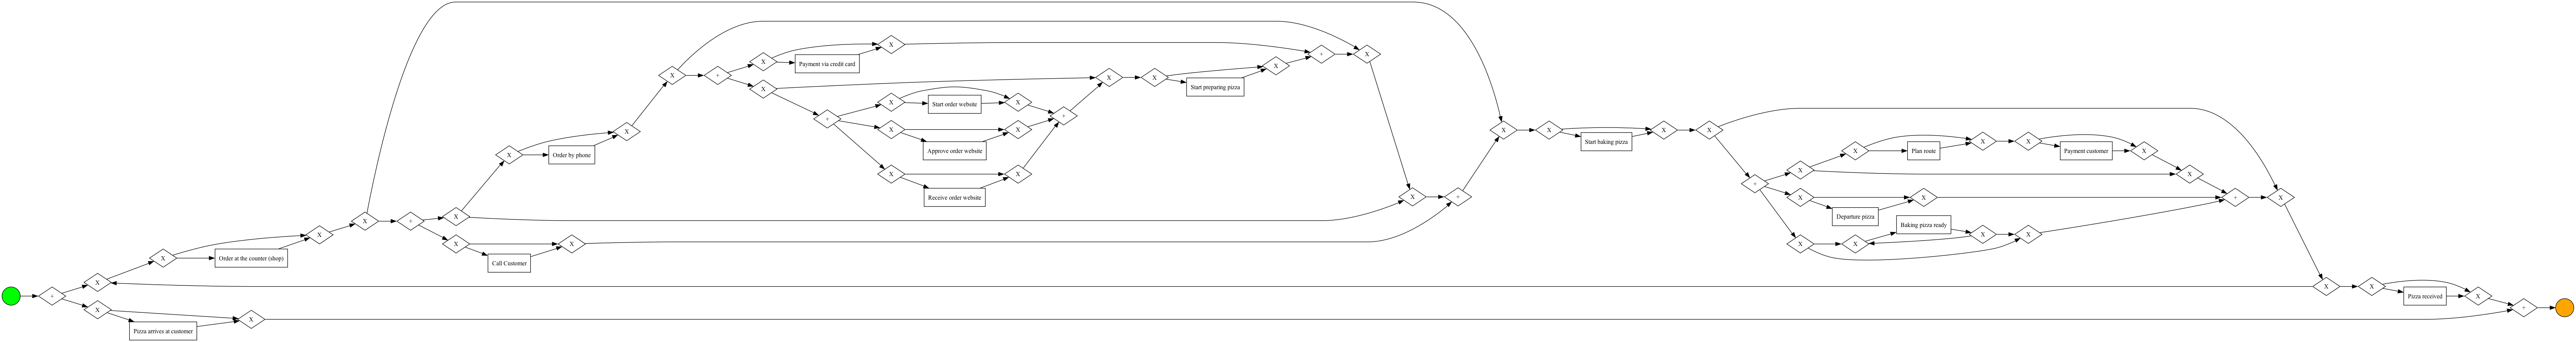

In [374]:
process_model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(process_model)

In [375]:
pm4py.stats.get_case_duration(log, case_id="895")

3780.0

In [376]:
df

,_CASE_KEY,Revenue,Costs,CustomerSatisfaction,Daytime,CustomerType_Adult,CustomerType_Senior,CustomerType_Student,CustomerType_Teenager,CustomerLocation_Munich District Five,...,Variant_1,Variant_2,Variant_3,Variant_4,Variant_6,Variant_7,Variant_8,Variant_9,Profit,IsOrderProfitable
0,895,17,13,3,14,False,False,True,False,False,...,True,False,False,False,False,False,False,False,4,True
1,426,19,10,3,13,False,False,True,False,False,...,True,False,False,False,False,False,False,False,9,True
2,690,9,16,0,12,False,False,False,True,False,...,True,False,False,False,False,False,False,False,-7,False
3,185,36,56,1,18,True,False,False,False,False,...,True,False,False,False,False,False,False,False,-20,False
4,1721,5,35,5,14,False,False,True,False,False,...,True,False,False,False,False,False,False,False,-30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1958,11,2,5,18,False,False,True,False,True,...,False,False,False,False,False,False,False,True,9,True
1822,792,54,23,3,11,False,False,True,False,False,...,False,False,False,False,False,False,False,True,31,True
1823,1500,29,2,4,18,False,False,False,True,False,...,False,False,False,False,False,False,False,True,27,True
1824,605,12,12,3,21,False,False,True,False,False,...,False,False,False,False,False,False,False,True,0,False


In [377]:
from typing import *
# Enhance dataframe with start and end activities
def getActivityByOrderingTimestamp(caseId, order: str) -> Optional[str]:
    cursor = con.cursor()
    cursor.execute(f"select ACTIVITY_EN from Pizza_Event where _case_key = ? order by eventtime {order} limit 1", (caseId, ))
    res = cursor.fetchone()
    cursor.close()
    if len(res) == 0:
        return None
    return res[0]

def getStartActivity(caseId) -> Optional[str]:
    return getActivityByOrderingTimestamp(caseId, "asc")

def getEndActivity(caseId) -> Optional[str]:
    return getActivityByOrderingTimestamp(caseId, "desc")


In [378]:
# Drop all cases of variant 5 because they are not in the log
#df = df[df["Variant"] != 5]


df["Duration"] = df["_CASE_KEY"].map(lambda x: pm4py.stats.get_case_duration(log, case_id=str(x)))
df["StartActivity"] = df["_CASE_KEY"].map(getStartActivity)
df["EndActivity"] = df["_CASE_KEY"].map(getEndActivity)
df.drop("_CASE_KEY", axis=1, inplace=True)
df

,Revenue,Costs,CustomerSatisfaction,Daytime,CustomerType_Adult,CustomerType_Senior,CustomerType_Student,CustomerType_Teenager,CustomerLocation_Munich District Five,CustomerLocation_Munich District Four,...,Variant_4,Variant_6,Variant_7,Variant_8,Variant_9,Profit,IsOrderProfitable,Duration,StartActivity,EndActivity
0,17,13,3,14,False,False,True,False,False,False,...,False,False,False,False,False,4,True,3780.0,Order by phone,Payment customer
1,19,10,3,13,False,False,True,False,False,False,...,False,False,False,False,False,9,True,2100.0,Order by phone,Payment customer
2,9,16,0,12,False,False,False,True,False,False,...,False,False,False,False,False,-7,False,2760.0,Order by phone,Payment customer
3,36,56,1,18,True,False,False,False,False,False,...,False,False,False,False,False,-20,False,3060.0,Order by phone,Payment customer
4,5,35,5,14,False,False,True,False,False,False,...,False,False,False,False,False,-30,False,2460.0,Order by phone,Payment customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,11,2,5,18,False,False,True,False,True,False,...,False,False,False,False,True,9,True,1020.0,Start order website,Start baking pizza
1822,54,23,3,11,False,False,True,False,False,False,...,False,False,False,False,True,31,True,360.0,Approve order website,Start baking pizza
1823,29,2,4,18,False,False,False,True,False,False,...,False,False,False,False,True,27,True,420.0,Start order website,Call Customer
1824,12,12,3,21,False,False,True,False,False,False,...,False,False,False,False,True,0,False,720.0,Start order website,Start baking pizza


In [379]:
# convert startactity with one hot encoding
df = pd.get_dummies(df, columns=["StartActivity"])
df = pd.get_dummies(df, columns=["EndActivity"])

In [380]:
# Drop Revenue and Costs because that would train the model to give us a non useful result
dfPredictPrfitablity = df.copy()

dfPredictPrfitablity.drop("Profit", axis=1, inplace=True)
dfPredictPrfitablity.drop("Costs", axis=1, inplace=True)
dfPredictPrfitablity.drop("Revenue", axis=1, inplace=True)
algo(dfPredictPrfitablity, "IsOrderProfitable")

Accuracy: 0.6338797814207651
Recall: 0.4964749536178108
Precision: 0.49097971514889943

CustomerSatisfaction 0.05925539945307147
Daytime 0.07863419982409692
CustomerType_Adult 0.015150226382579988
CustomerType_Senior 0.00828176741724313
CustomerType_Student 0.021706037472616773
CustomerType_Teenager 0.017471904445207204
CustomerLocation_Munich District Five 0.011062117146257542
CustomerLocation_Munich District Four 0.014799541884243204
CustomerLocation_Munich District One 0.020821625679735216
CustomerLocation_Munich District Three 0.01596645212941166
CustomerLocation_Munich District Two 0.014882238794404111
DistributionChannel_BestOrder Inc. 0.019807157900789806
DistributionChannel_Deliver Now Holding 0.020991958395982824
DistributionChannel_Deliveruu Inc. 0.012839798273365706
DistributionChannel_Feedera SE 0.01930050129893492
DistributionChannel_Heropizza Lmtd. 0.006531633555758311
DistributionChannel_Orderly SE 0.010182668076997827
DistributionChannel_TownExpress Inc. 0.0087188851853

In [382]:
dfPredictCustomerSatisfaction = df.copy()
dfPredictCustomerSatisfaction["IsCustomerSatisfied"] = dfPredictCustomerSatisfaction["CustomerSatisfaction"] >= 3
algo(dfPredictCustomerSatisfaction, "CustomerSatisfaction")

Accuracy: 0.48360655737704916
Recall: 0.4130795238319888
Precision: 0.40795427262260864

Revenue 0.05781563053541482
Costs 0.05685174339657642
Daytime 0.049770745575038716
CustomerType_Adult 0.010412179943950437
CustomerType_Senior 0.005810768502011287
CustomerType_Student 0.014533791680878325
CustomerType_Teenager 0.012512188281337705
CustomerLocation_Munich District Five 0.007052110702121478
CustomerLocation_Munich District Four 0.008471429564295767
CustomerLocation_Munich District One 0.017043510378451105
CustomerLocation_Munich District Three 0.011738321480409835
CustomerLocation_Munich District Two 0.011568456040502818
DistributionChannel_BestOrder Inc. 0.013499522471311427
DistributionChannel_Deliver Now Holding 0.01454018486901454
DistributionChannel_Deliveruu Inc. 0.007458243177920027
DistributionChannel_Feedera SE 0.013699679406392962
DistributionChannel_Heropizza Lmtd. 0.0036023153498936384
DistributionChannel_Orderly SE 0.006084630600611256
DistributionChannel_TownExpress In